# Computer Vision

## Fine-tuning

In [1]:
!git clone https://github.com/huggingface/diffusers.git
%cd diffusers/examples/dreambooth

Cloning into 'diffusers'...
remote: Enumerating objects: 78580, done.
remote: Counting objects: 100% (408/408), done.
remote: Compressing objects: 100% (246/246), done.
remote: Total 78580 (delta 304), reused 172 (delta 157), pack-reused 78172 (from 3)
Receiving objects: 100% (78580/78580), 55.78 MiB | 28.52 MiB/s, done.
Resolving deltas: 100% (57295/57295), done.
/content/diffusers/examples/dreambooth


In [2]:
import os
os.getcwd()

'/content/diffusers/examples/dreambooth'

In [3]:
!pip install git+https://github.com/huggingface/diffusers.git
!pip show diffusers

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-ntyibivd
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-ntyibivd
  Resolved https://github.com/huggingface/diffusers.git to commit 91008aabc4b8dbd96a356ab6f457f3bd84b10e8b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.33.0.dev0-py3-none-any.whl size=3224897 sha256=4c640443bf9a41e61f8a4fb2ec3f808ecaee8164cd0124c154941d4e7ec67bf0
  Stored in directory: /tmp/pip-ephem-wheel-cache-siihfq90/wheels/4d/b7/a8/6f9549ceec5daad78675b857ac57d697c387062506520a7b50
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.31.0
    Uninstalling diffusers-0.31.0:
      Successfully uninstalled diffusers-0.31.0
Name: diffusers
Version: 0.33.0.dev0
Summary: State-of-the

In [6]:
!accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path="stabilityai/sd-turbo" \
  --instance_data_dir="/content/drive/MyDrive/train_pic" \
  --output_dir="/content/drive/MyDrive/sd-turbo-finetuned" \
  --instance_prompt="photos of my face" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=1000

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2025-01-01 01:54:51.769070: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-01 01:54:51.789934: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-01 01:54:51.796210: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has alread

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

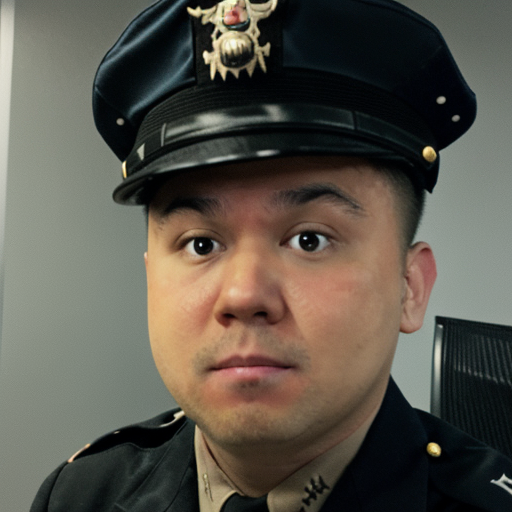

In [17]:
from diffusers import StableDiffusionPipeline
import torch

fine_tuned_model = "/content/drive/MyDrive/sd-turbo-finetuned"
pipe = StableDiffusionPipeline.from_pretrained(fine_tuned_model, torch_dtype=torch.float16)
pipe.to("cuda")

prompt = "my face as a officer, sitting in the office"

image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]

image